In [1]:
from Coulomb import *
from plotting import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
matplotlib.__version__

'3.1.1'

In [2]:
test = Coulomb(QE, QE, MI, MI, 200, 1E19, False, False, True)

In [3]:
t3, vHist3 = test.beam_EM(17000, 500, 1E-3, 0.5, 1000)
t3, vHist3_MEM = test.beam_MEM(17000, 500, 1E-3, 0.5, 1000)
t3, vHist3_strat = test.beam_EM(17000, 500, 1E-3, 0.5, 1000, strat = True)

[  0. 100. 200. 300. 400. 501.]


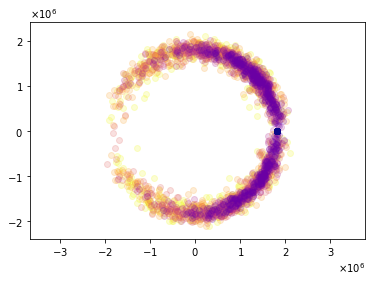

In [13]:
fig, ax = plt.subplots()
vSpaceSnaps(ax, vHist3_strat, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)
# vSpaceSnaps(ax, vHist3_MEM, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)

# formatAndSave(fig, ax, lines, '$v_\parallel$ [m/s]', '$v_\perp$ [m/s]', 
#               title = 'Velocity Space', fontsize = 16, filename = 'Circle_snaps_MEM.pdf')

In [7]:
t4, vHist4 = test.beam_EM(17000, 500, 1E-4, 0.5, 1000)
t4, vHist4_MEM = test.beam_MEM(17000, 500, 1E-4, 0.5, 1000)
t4, vHist4_strat = test.beam_EM(17000, 500, 1E-4, 0.5, 1000, strat = True)

[   0.  200.  400.  600.  800. 1001.]


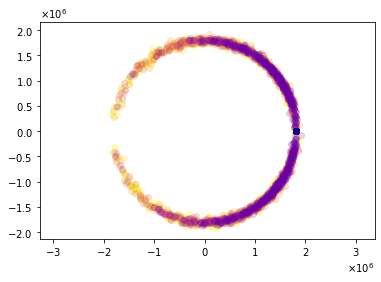

In [17]:
fig, ax = plt.subplots()
vSpaceSnaps(ax, vHist4_strat, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)

[  0. 100. 200. 300. 400. 501.]
[  0. 100. 200. 300. 400. 501.]
[  0. 100. 200. 300. 400. 501.]


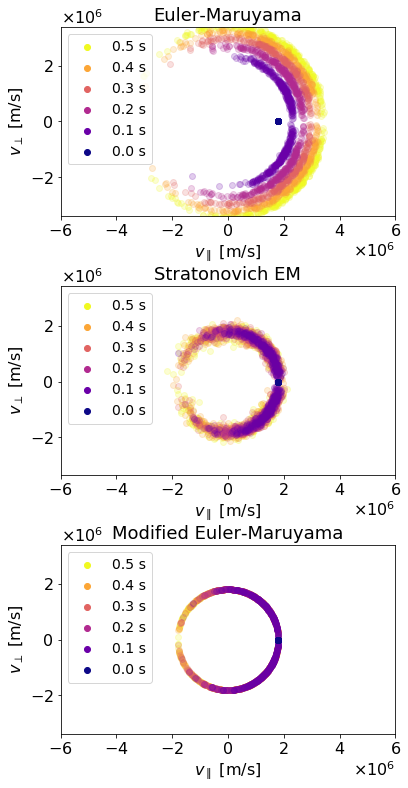

In [31]:
fig= plt.figure()
ax0 = fig.add_subplot(311)

# ax0.set_ylim(-4, 4)
plt.axis('equal')
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0), useMathText=True)
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0, 0), useMathText=True)
ax1 = fig.add_subplot(312, sharex = ax0)
plt.axis('equal')
plt.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0), useMathText=True)
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0, 0), useMathText=True)
ax2 = fig.add_subplot(313, sharex = ax0)

plt.axis('equal')
# plt.suptitle('Velocity space distribution')
updateGlobal(16)
fig.set_size_inches(6, 13)
# ax1.ticklabel_format(axis = 'x', style = 'sci', scilimits=(0, 0), useMathText=True)

vSpaceSnaps(ax0, vHist3, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)
ax0.set_title('Euler-Maruyama')
vSpaceSnaps(ax1, vHist3_strat, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)
ax1.set_title('Stratonovich EM')

vSpaceSnaps(ax2, vHist3_MEM, np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5]), 0.5)
ax2.set_title('Modified Euler-Maruyama')

plt.subplots_adjust(hspace = 0.375)

ax0.set_xlim(-6e6, 6e6)
ax0.set_xlabel('$v_{\parallel}$ [m/s]')
ax0.set_ylabel('$v_{\perp}$ [m/s]')
# ax0.set_xticklabels('')

ax1.set_xlim(-6e6, 6e6)
ax1.set_xlabel('$v_{\parallel}$ [m/s]')
ax1.set_ylabel('$v_{\perp}$ [m/s]')

ax2.set_xlim(-6e6, 6e6)
ax2.set_xlabel('$v_{\parallel}$ [m/s]')
ax2.set_ylabel('$v_{\perp}$ [m/s]')

leg0 = ax0.legend(loc = 2)
leg1 = ax1.legend(loc = 2)
leg2 = ax2.legend(loc = 2)
for lh in leg0.legendHandles + leg1.legendHandles+ leg2.legendHandles:
    lh.set_alpha(1)
fig.savefig('circle_comp_strat.pdf')

In [4]:
t2, vHist2_EM = test.beam_EM(17000, 100, 1E-3, 0.1, 1000, strat = True)
speed2_EM = np.linalg.norm(vHist2_EM, axis = 2)
t4, vHist4_EM = test.beam_EM(17000, 100, 1E-5, 0.1, 1000, strat = True)
speed4_EM = np.linalg.norm(vHist4_EM, axis = -1)

In [5]:
t2, vHist2 = test.beam_MEM(17000, 100, 1E-3, 0.1, 1000)
speed2 = np.linalg.norm(vHist2, axis = -1)
t4, vHist4 = test.beam_MEM(17000, 100, 1E-5, 0.1, 1000)
speed4 = np.linalg.norm(vHist4, axis = -1)

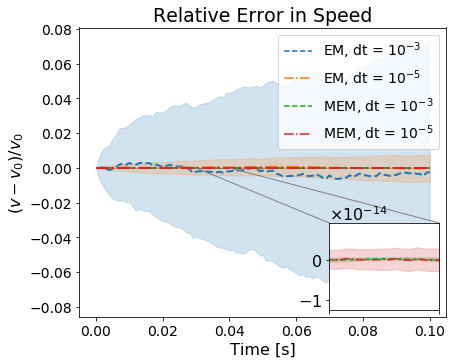

In [13]:
fig, ax = plt.subplots()
lines = []
lines = aveAndSTD(ax, speed2_EM, 0.1, markers = '--', c = 'C0', label = 'EM, dt = $10^{-3}$')
lines += aveAndSTD(ax, speed4_EM, 0.1, markers = '-.', c = 'C1', label = 'EM, dt = $10^{-5}$')
lines += aveAndSTD(ax, speed2, 0.1, markers = '--', c = 'C2', label = 'MEM, dt = $10^{-3}$')
lines += aveAndSTD(ax, speed4, 0.1, markers = '-.', c = 'C3', label = 'MEM, dt = $10^{-5}$')
# plt.ticklabel_format(axis = 'y', style = 'sci', scilimits=(0, 0))
formatAndSave(fig, ax, lines, 'Time [s]', '$(v - v_0) / v_0$', title = "Relative Error in Speed", fontsize = 16)
fig.set_size_inches(6.5, 5)
# ax.linewidth(2)

axins = inset_axes(ax, width='30%', height='30%', loc=4)
axins.set_xticklabels('')
axins.set_xlim(0.03, 0.04)
aveAndSTD(axins, speed2, 0.5, markers = '--', c = 'C2', label = 'MEM, dt = 1E-3')
aveAndSTD(axins, speed4, 0.5, markers = '-.', c = 'C3', label = 'MEM, dt = 1E-5')
mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
axins.ticklabel_format(axis = 'y', style = 'sci', scilimits=(-2, 0), useMathText=True)
fig.savefig('./figures/speed_rel_1.pdf', bbox_inches = "tight")